In [56]:
#import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

We will load the CSV file into a pandas DataFrame. We will then inspect the data for missing values, duplicates and oultiers.

In [57]:
aal_dataset = pd.read_csv('1716984926_ausapparalsales4thqrt2020/AusApparalSales4thQrt2020.csv')

In [58]:
aal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [59]:
aal_dataset.sample(10)

,Date,Time,State,Group,Unit,Sales
6412,17-Dec-2020,Afternoon,SA,Kids,18,45000
3630,14-Nov-2020,Afternoon,NT,Women,4,10000
3575,13-Nov-2020,Evening,VIC,Seniors,38,95000
1064,13-Oct-2020,Evening,QLD,Kids,16,40000
6601,19-Dec-2020,Morning,QLD,Men,18,45000
670,8-Oct-2020,Evening,TAS,Women,10,25000
4161,20-Nov-2020,Evening,VIC,Men,35,87500
5957,11-Dec-2020,Afternoon,TAS,Men,15,37500
6400,17-Dec-2020,Afternoon,NT,Kids,8,20000
585,7-Oct-2020,Evening,TAS,Men,8,20000


In [60]:
aal_dataset.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [61]:
aal_dataset.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

There are no missing values in the dataset as can be seen above. Let's check for duplicates.

In [62]:
if aal_dataset.duplicated().any():
    print("Duplicates found")
else:
    print('No duplicates in the dataset')

No duplicates in the dataset


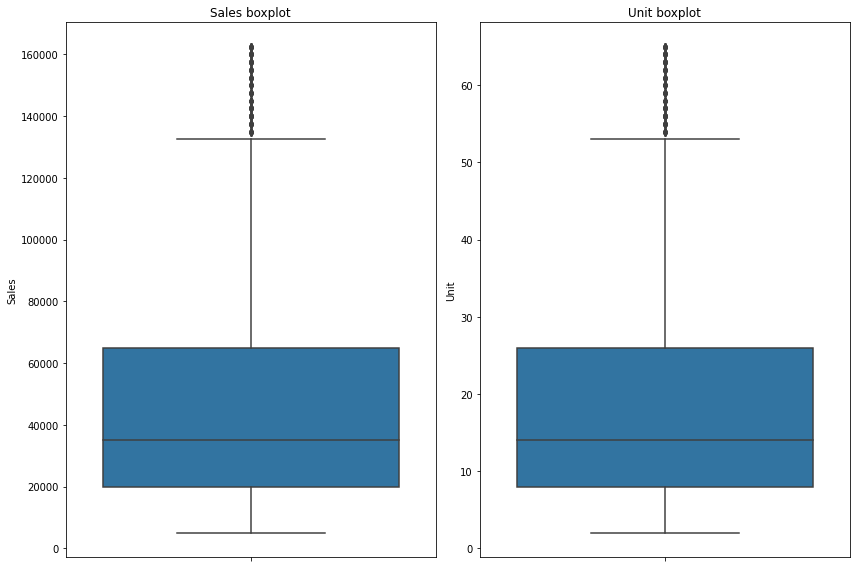

In [63]:
#Boxplots of columns = 'Sales' and 'Unit'

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)  #subplot for column 'Sales'
sns.boxplot(y=aal_dataset['Sales'])
plt.title('Sales boxplot')
plt.xlabel('')

plt.subplot(1,2,2) #subplot for column 'Unit'
sns.boxplot(y=aal_dataset['Unit'])
plt.title('Unit boxplot')

plt.tight_layout()
plt.show()

In [64]:
#Summary statistics
aal_dataset.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## 2. Data analysis

In [65]:
# a. Perform descriptive statistical analysis on the data in the Sales and Unit columns
sales_stats = aal_dataset['Sales'].describe()
unit_stats = aal_dataset['Unit'].describe()

print("Descriptive Statistics for Sales:\n", sales_stats)
print("\nDescriptive Statistics for Unit:\n", unit_stats)

# Calculate mode separately as describe() doesn't include it
sales_mode = aal_dataset['Sales'].mode()
unit_mode = aal_dataset['Unit'].mode()

print("\nMode for Sales:\n", sales_mode)
print("\nMode for Unit:\n", unit_mode)


Descriptive Statistics for Sales:
 count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

Descriptive Statistics for Unit:
 count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64

Mode for Sales:
 0    22500
dtype: int64

Mode for Unit:
 0    9
dtype: int64


In [66]:
# #Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# #Selecting the columns to normalize
# columns_to_normalize = ['Unit', 'Sales']

# aal_dataset[columns_to_normalize] = scaler.fit_transform(aal_dataset[columns_to_normalize])
# aal_dataset.head(10)

In [67]:
# b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

highest_sales_group = aal_dataset.groupby('Group')['Sales'].sum().idxmax()
highest_sales_group_value = aal_dataset.groupby('Group')['Sales'].sum().max()
print(f"Group with highest sales belong to{highest_sales_group} and the total sales value is ${highest_sales_group_value}")

lowest_sales_group = aal_dataset.groupby('Group')['Sales'].sum().idxmin()
lowest_sales_group_value = aal_dataset.groupby('Group')['Sales'].sum().min()
print(f"Group with lowest sales belong to{lowest_sales_group} and the total sales value is ${lowest_sales_group_value}")


Group with highest sales belong to Men and the total sales value is $85750000
Group with lowest sales belong to Seniors and the total sales value is $84037500


In [68]:

#State with highest and lowest sales

highest_sales_state = aal_dataset.groupby('State')['Sales'].sum().idxmax()
highest_sales_state_value = aal_dataset.groupby('State')['Sales'].sum().max()
print(f"State with highest sales belong to{highest_sales_state} and the total sales value is ${highest_sales_state_value}")

lowest_sales_state = aal_dataset.groupby('State')['Sales'].sum().idxmin()
lowest_sales_state_value = aal_dataset.groupby('State')['Sales'].sum().min()
print(f"State with lowest sales belong to{lowest_sales_state} and the total sales value is ${lowest_sales_state_value}")


State with highest sales belong to VIC and the total sales value is $105565000
State with lowest sales belong to WA and the total sales value is $22152500


In [69]:
# d. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

# Convert 'Date' to datetime objects
aal_dataset['Date'] = pd.to_datetime(aal_dataset['Date'], format = '%d-%b-%Y')

# Setting Date as index
aal_dataset.set_index('Date', inplace=True)

weekly_sales = aal_dataset['Sales'].resample('W').sum()
print("Weekly Sales Report:")
print(weekly_sales)


Weekly Sales Report:
Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64


In [70]:
monthly_sales = aal_dataset['Sales'].resample('M').sum()
print("Monthly Sales Report:")
print(monthly_sales)

Monthly Sales Report:
Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64


In [71]:
# Quarterly Sales Report
quarterly_sales = aal_dataset['Sales'].resample('Q').sum()
print("\nQuarterly Sales Report:")
print(quarterly_sales)


Quarterly Sales Report:
Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64


## 3.Data visualization

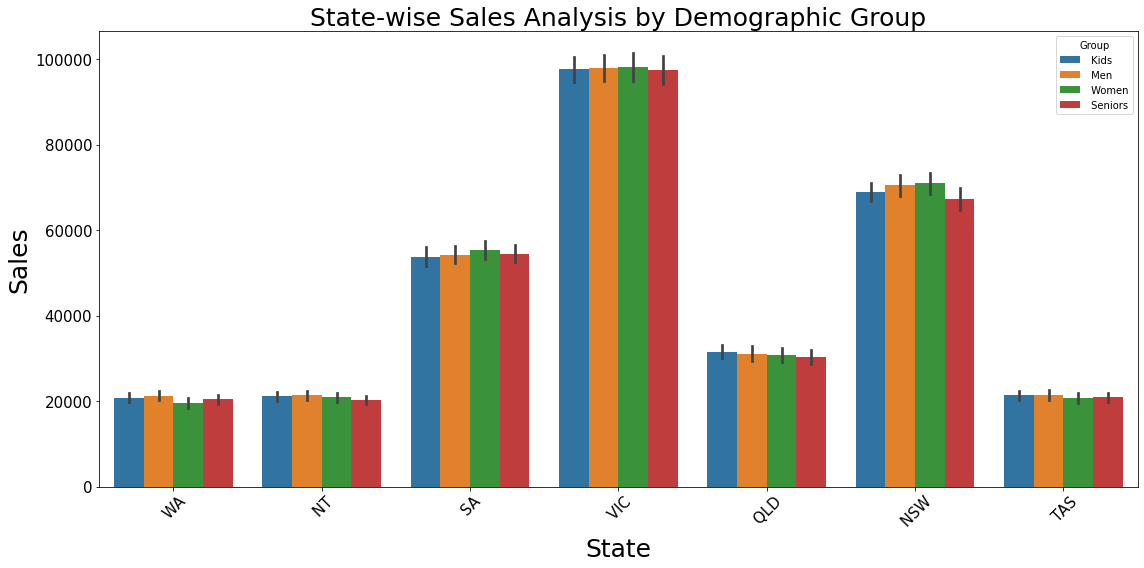

In [37]:
# State-wise Sales Analysis for Different Demographic Groups

plt.figure(figsize=(16, 8))
sns.barplot(x='State', y='Sales', hue= 'Group', data=aal_dataset)
plt.title('State-wise Sales Analysis by Demographic Group', fontsize=25)
plt.xlabel('State', fontsize=25)
plt.ylabel('Sales', fontsize=25)
plt.xticks(rotation=45, fontsize =15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

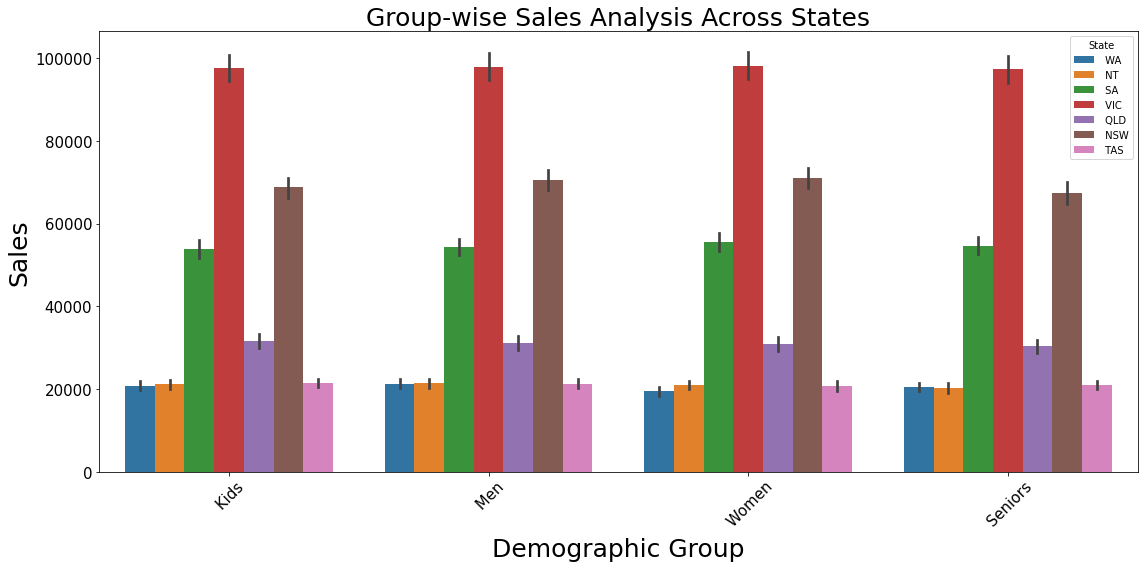

In [38]:
# Group-wise Sales Analysis Across Various States

plt.figure(figsize=(16, 8))
sns.barplot(x='Group', y='Sales', hue= 'State', data=aal_dataset)
plt.title('Group-wise Sales Analysis Across States', fontsize=25)
plt.xlabel('Demographic Group', fontsize=25)
plt.ylabel('Sales', fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

In [87]:
# Define a font size dictionary
font_sizes = {
    'title': 24,
    'xlabel': 20,
    'ylabel': 20,
    'xticks': 16,
    'yticks': 16
}
# Define a scaling factor
scaling_factor = 1e3  # Scale to thousands

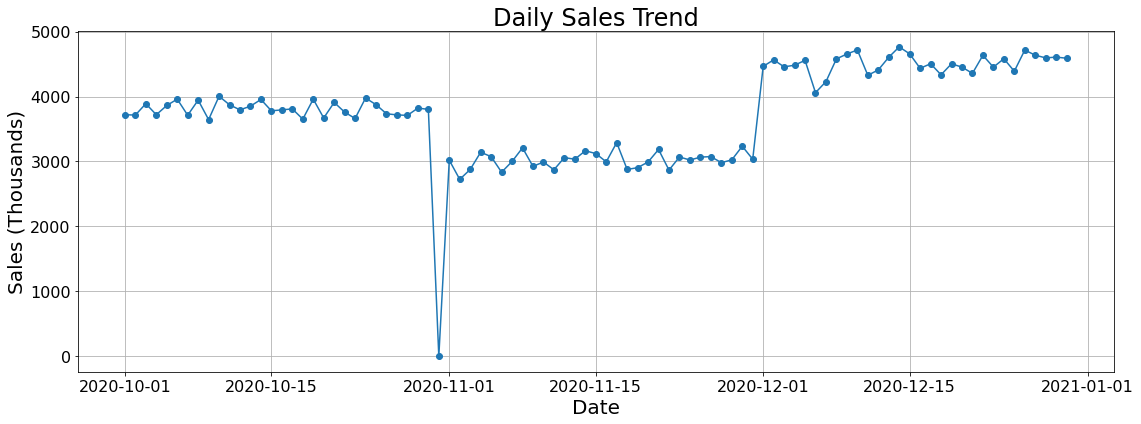

In [88]:
# 1. Daily Sales Chart
daily_sales = aal_dataset['Sales'].resample('D').sum()
plt.figure(figsize=(16, 6))
plt.plot(daily_sales.index, daily_sales.values / scaling_factor, marker='o', linestyle='-')
plt.title('Daily Sales Trend', fontsize=font_sizes['title'])
plt.xlabel('Date', fontsize=font_sizes['xlabel'])
plt.ylabel('Sales (Thousands)', fontsize=font_sizes['ylabel'])
plt.grid(True)
plt.xticks(rotation=0, fontsize=font_sizes['xticks'])  # Keep x-axis labels horizontal for readability
plt.yticks(fontsize=font_sizes['yticks'])
plt.tight_layout()
plt.show()

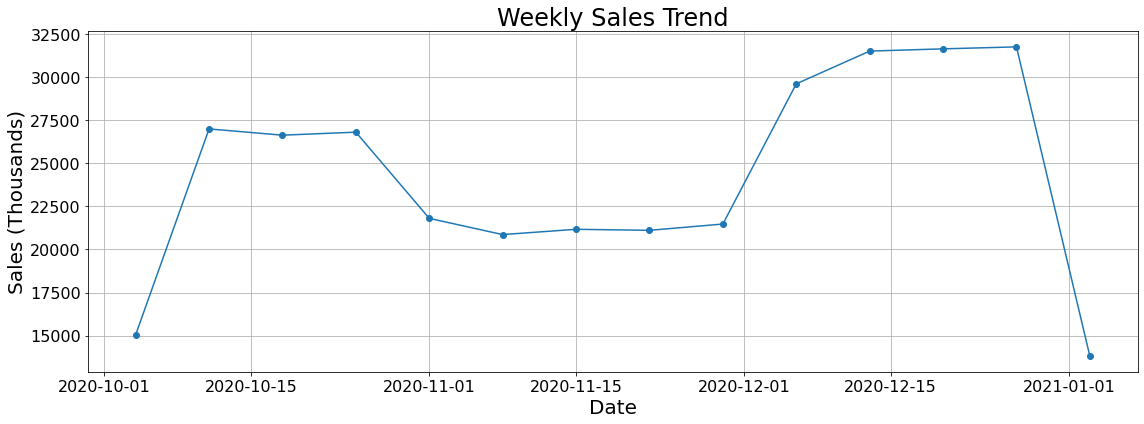

In [89]:
# 2. Weekly Sales Chart
weekly_sales = aal_dataset['Sales'].resample('W').sum()
plt.figure(figsize=(16, 6))
plt.plot(weekly_sales.index, weekly_sales.values / scaling_factor, marker='o', linestyle='-')
plt.title('Weekly Sales Trend', fontsize=font_sizes['title'])
plt.xlabel('Date', fontsize=font_sizes['xlabel'])
plt.ylabel('Sales (Thousands)', fontsize=font_sizes['ylabel'])
plt.grid(True)
plt.xticks(rotation=0, fontsize=font_sizes['xticks'])  # Keep x-axis labels horizontal for readability
plt.yticks(fontsize=font_sizes['yticks'])
plt.tight_layout()
plt.show()

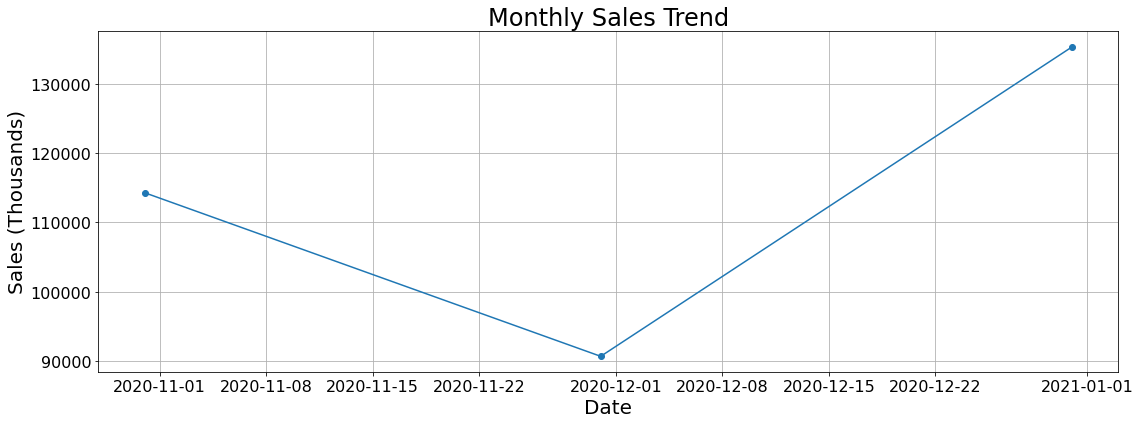

In [90]:
# 3. Monthly Sales Chart
monthly_sales = aal_dataset['Sales'].resample('M').sum()
plt.figure(figsize=(16, 6))
plt.plot(monthly_sales.index, monthly_sales.values / scaling_factor, marker='o', linestyle='-')
plt.title('Monthly Sales Trend', fontsize=font_sizes['title'])
plt.xlabel('Date', fontsize=font_sizes['xlabel'])
plt.ylabel('Sales (Thousands)', fontsize=font_sizes['ylabel'])
plt.grid(True)
plt.xticks(rotation=0, fontsize=font_sizes['xticks'])  # Keep x-axis labels horizontal for readability
plt.yticks(fontsize=font_sizes['yticks'])
plt.tight_layout()
plt.show()

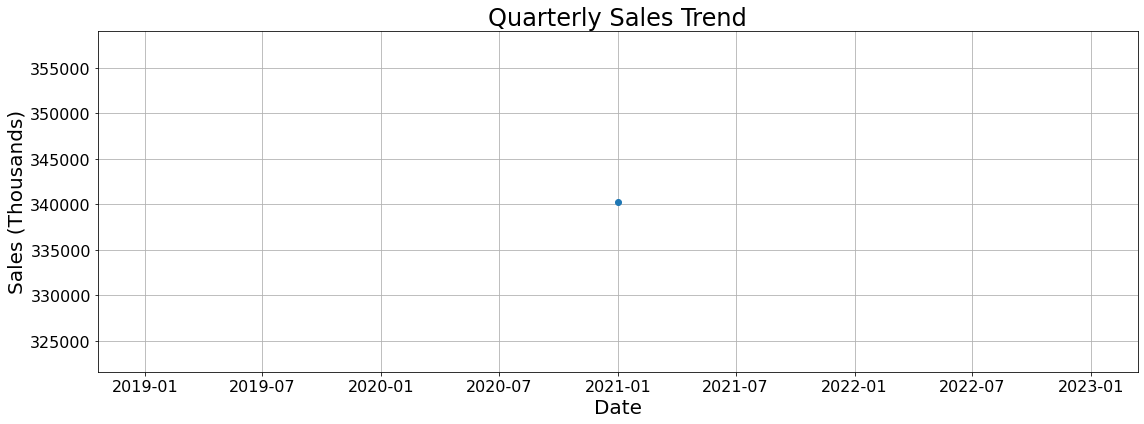

In [91]:
# 4. Quarterly Sales Chart
quarterly_sales = aal_dataset['Sales'].resample('Q').sum()
plt.figure(figsize=(16, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values / scaling_factor, marker='o', linestyle='-')
plt.title('Quarterly Sales Trend', fontsize=font_sizes['title'])
plt.xlabel('Date', fontsize=font_sizes['xlabel'])
plt.ylabel('Sales (Thousands)', fontsize=font_sizes['ylabel'])
plt.xticks(fontsize=font_sizes['xticks'])
plt.yticks(fontsize=font_sizes['yticks'])
plt.grid(True)
plt.tight_layout()
plt.show()


Sales by Time of Day:
 Time
 Morning      114207500
 Afternoon    114007500
 Evening      112087500
Name: Sales, dtype: int64

Peak Sales Period:  Morning
Off-Peak Sales Period:  Evening


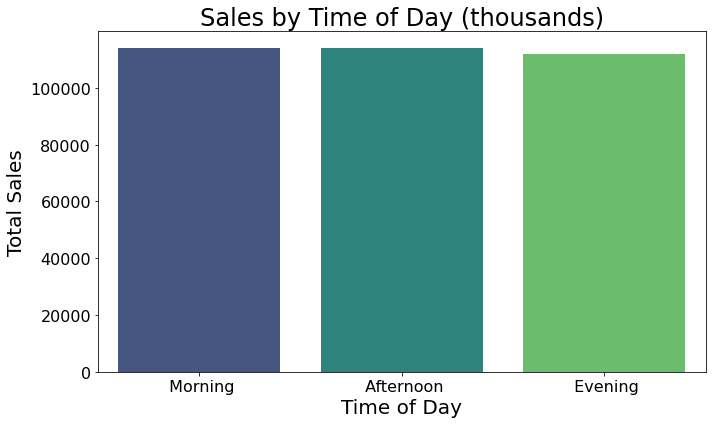

In [92]:
# 4. Time-of-the-day analysis: Identify peak and off-peak sales periods
# Group by 'Time' and calculate total sales for each time period
sales_by_time = aal_dataset.groupby('Time')['Sales'].sum().sort_values(ascending=False)

print("Sales by Time of Day:\n", sales_by_time)

# Identify peak and off-peak sales periods
peak_time = sales_by_time.idxmax()
off_peak_time = sales_by_time.idxmin()

print("\nPeak Sales Period:", peak_time)
print("Off-Peak Sales Period:", off_peak_time)

# Visualization: Sales by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_time.index, y=sales_by_time.values / scaling_factor, palette="viridis")
plt.title('Sales by Time of Day (thousands)', fontsize=font_sizes['title'])
plt.xlabel('Time of Day', fontsize=font_sizes['xlabel'])
plt.ylabel('Total Sales', fontsize=font_sizes['ylabel'])
plt.xticks(rotation=0, fontsize=font_sizes['xticks'])  # Keep x-axis labels horizontal for readability
plt.yticks(fontsize=font_sizes['yticks'])
plt.tight_layout()
plt.show()